## Abstract
Here we are trying to do classification on the data, having target as the churn* factor
We will be using knn and Random forest classification
I have tried to convert all the categorical values to integers/float by one-hot-encoding and by replacing yes/no/No internet service by 1/0/2
There are no null values, thus directly went for standard scaling( Z score scaling)

From sklearn imported train test split, where all the independant variables are saved in the 'x' and dependant(target) in 'y'


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
df = pd.read_csv('churn_train.csv')

In [34]:
df.head(3)

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Classification
traget = Churn

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         6499 non-null   object 
 1   Gender             6499 non-null   object 
 2   Senior Citizen     6499 non-null   int64  
 3   Partner            6499 non-null   object 
 4   Dependents         6499 non-null   object 
 5   Tenure             6499 non-null   int64  
 6   Phone Service      6499 non-null   object 
 7   Multiple Lines     6499 non-null   object 
 8   Internet Service   6499 non-null   object 
 9   Online Security    6499 non-null   object 
 10  Online Backup      6499 non-null   object 
 11  Device Protection  6499 non-null   object 
 12  Tech Support       6499 non-null   object 
 13  Streaming TV       6499 non-null   object 
 14  Streaming Movies   6499 non-null   object 
 15  Contract           6499 non-null   object 
 16  Paperless Billing  6499 

In [36]:
x = df.iloc[:,1:20]

In [37]:
x.head(1)

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [38]:
y = df.iloc[:,-1:]

In [39]:
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
6494,No
6495,Yes
6496,Yes
6497,No


In [40]:
y = pd.DataFrame(np.where(y['Churn'] == 'No', 0, 1),columns=['Churn'])


In [41]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
6494,0
6495,1
6496,1
6497,0


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [43]:
x

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,Female,0,No,Yes,26,No,No phone service,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,29.80,786.50
6495,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.65,69.65
6496,Male,1,Yes,No,40,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,101.85,4086.30
6497,Male,0,No,No,52,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.05,5364.80


In [44]:
x.replace({'Yes':1,'No':0, 'No internet service':2},inplace=True)

In [45]:
x.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15
3,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65


In [46]:
 y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [47]:
gen = pd.get_dummies(x['Gender'],drop_first=True)

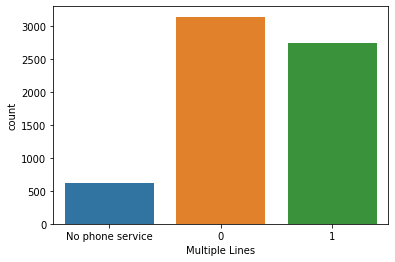

In [48]:
sns.countplot(x='Multiple Lines',data=x)

In [49]:
lines = pd.get_dummies(x['Multiple Lines'],drop_first=True)

In [50]:
lines.head(2)

,1,No phone service
0,0,1
1,0,0


In [51]:
internet = pd.get_dummies(x['Internet Service'],drop_first=True)
internet.head(2)

,DSL,Fiber optic
0,1,0
1,1,0


In [52]:
contract = pd.get_dummies(x['Contract'],drop_first=True)
contract.head(2)

,One year,Two year
0,0,0
1,1,0


In [53]:
pay = pd.get_dummies(x['Payment Method'],drop_first=True)
pay.head(2)

,Credit card (automatic),Electronic check,Mailed check
0,0,1,0
1,0,0,1


In [54]:
x.drop(['Gender','Multiple Lines','Internet Service','Contract','Payment Method'],axis=1,inplace=True)

In [55]:
x = pd.concat([x,gen,pay,contract,internet,lines],axis=1)

In [56]:
x.head()

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,...,Male,Credit card (automatic),Electronic check,Mailed check,One year,Two year,DSL,Fiber optic,1,No phone service
0,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,0,0,0,34,1,1,0,1,0,0,...,1,0,0,1,1,0,1,0,0,0
2,0,0,0,2,1,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3,0,0,0,45,0,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,1
4,0,0,0,2,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [57]:
ss = StandardScaler()

In [59]:
x

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,...,Male,Credit card (automatic),Electronic check,Mailed check,One year,Two year,DSL,Fiber optic,1,No phone service
0,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,0,0,0,34,1,1,0,1,0,0,...,1,0,0,1,1,0,1,0,0,0
2,0,0,0,2,1,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3,0,0,0,45,0,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,1
4,0,0,0,2,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,0,0,1,26,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
6495,0,0,0,1,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
6496,1,1,0,40,1,1,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
6497,0,0,0,52,1,0,1,1,0,1,...,1,0,1,0,0,0,0,1,1,0


In [61]:
col = x.columns

In [63]:
x = pd.DataFrame(ss.fit_transform(x),columns=col)

In [65]:
#standadized train
x

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,...,Male,Credit card (automatic),Electronic check,Mailed check,One year,Two year,DSL,Fiber optic,1,No phone service
0,-0.440466,1.034285,-0.651849,-1.276060,-3.093134,-0.908692,0.282435,-1.001693,-0.908450,-1.072735,...,-1.012542,-0.525419,1.406577,-0.544216,-0.513956,-0.563193,1.389762,-0.886527,-0.855384,3.093134
1,-0.440466,-0.966852,-0.651849,0.066342,0.323297,0.344350,-0.998477,0.280308,-0.908450,-1.072735,...,0.987613,-0.525419,-0.710946,1.837507,1.945691,-0.563193,1.389762,-0.886527,-0.855384,-0.323297
2,-0.440466,-0.966852,-0.651849,-1.235381,0.323297,0.344350,0.282435,-1.001693,-0.908450,-1.072735,...,0.987613,-0.525419,-0.710946,1.837507,-0.513956,-0.563193,1.389762,-0.886527,-0.855384,-0.323297
3,-0.440466,-0.966852,-0.651849,0.513809,-3.093134,0.344350,-0.998477,0.280308,0.344525,-1.072735,...,0.987613,-0.525419,-0.710946,-0.544216,1.945691,-0.563193,1.389762,-0.886527,-0.855384,3.093134
4,-0.440466,-0.966852,-0.651849,-1.235381,0.323297,-0.908692,-0.998477,-1.001693,-0.908450,-1.072735,...,-1.012542,-0.525419,1.406577,-0.544216,-0.513956,-0.563193,-0.719548,1.127997,-0.855384,-0.323297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,-0.440466,-0.966852,1.534098,-0.259089,-3.093134,-0.908692,-0.998477,0.280308,-0.908450,-1.072735,...,-1.012542,-0.525419,-0.710946,1.837507,-0.513956,-0.563193,1.389762,-0.886527,-0.855384,3.093134
6495,-0.440466,-0.966852,-0.651849,-1.276060,0.323297,-0.908692,-0.998477,-1.001693,-0.908450,-1.072735,...,0.987613,-0.525419,1.406577,-0.544216,-0.513956,-0.563193,-0.719548,1.127997,-0.855384,-0.323297
6496,2.270321,1.034285,-0.651849,0.310415,0.323297,0.344350,-0.998477,-1.001693,-0.908450,0.234787,...,0.987613,-0.525419,1.406577,-0.544216,-0.513956,-0.563193,-0.719548,1.127997,1.169066,-0.323297
6497,-0.440466,-0.966852,-0.651849,0.798561,0.323297,-0.908692,0.282435,0.280308,-0.908450,0.234787,...,0.987613,-0.525419,1.406577,-0.544216,-0.513956,-0.563193,-0.719548,1.127997,1.169066,-0.323297


In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [135]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=40)

In [136]:
#troubleshoot
x_train = np.nan_to_num(x_train)
y_train = np.nan_to_num(y_train)
x_test = np.nan_to_num(x_test)

In [137]:
knn.fit(x_train,y_train)

<ipython-input-137-17b0ab828d68>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [138]:
y_pred = knn.predict(x_test)

In [142]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [140]:
acc = accuracy_score(y_test,y_pred)
acc

0.7841025641025641

In [141]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1266,  193],
       [ 228,  263]], dtype=int64)

In [144]:
cl = classification_report(y_test,y_pred)
cl

'              precision    recall  f1-score   support\n\n           0       0.85      0.87      0.86      1459\n           1       0.58      0.54      0.56       491\n\n    accuracy                           0.78      1950\n   macro avg       0.71      0.70      0.71      1950\nweighted avg       0.78      0.78      0.78      1950\n'

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
rf = RandomForestClassifier(n_jobs=-1)

In [153]:
rf.fit(x_train,y_train)

<ipython-input-153-895403b03771>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [154]:
y_pred_rf = rf.predict(x_test)

In [155]:
acc1 = accuracy_score(y_test,y_pred_rf)
acc1

0.796923076923077

In [156]:
cm1 = confusion_matrix(y_test,y_pred_rf)
cm1

array([[1309,  150],
       [ 246,  245]], dtype=int64)

### Conclusion
After using both models, felt random forest performed better and achieved an accuracy of 79.6% , confusion matrix gave us a little mixed values, precision, recall and f1 value are also not very great, but with some hyperparameter optimization and better preprocessing and exploration the accuracy can be increased


### Originality
The whole code is mine, except the part where the floats ranged to infinity and had to use np.nan_to_num*, which i used from stack or kaggle
I have learned these basic steps and everything from Youtube from Krish naik's channel so it may look similar